In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)
tf.random.set_seed(42)

daten importieren 

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


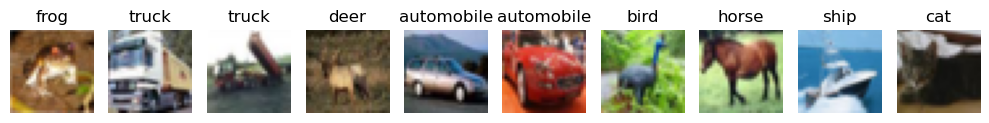

In [47]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Display dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Display example images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
plt.tight_layout()
plt.show()

custom swish activation funktion

In [48]:
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

# Register custom activation
tf.keras.utils.get_custom_objects().update({'swish': tf.keras.layers.Activation(swish)})

modell1 DNN swish activation


In [49]:
def create_base_model():
    model = keras.Sequential()
    
    # Flatten input
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    # 20 hidden layers with He initialization and Swish activation
    for _ in range(20):
        model.add(layers.Dense(100, 
                              kernel_initializer='he_normal',
                              activation='swish'))
    
    # Output layer with softmax
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

# Create and train the base model
model_base = create_base_model()
print("Base model summary:")
model_base.summary()

Base model summary:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 3072)              0         
                                                                 
 dense_441 (Dense)           (None, 100)               307300    
                                                                 
 dense_442 (Dense)           (None, 100)               10100     
                                                                 
 dense_443 (Dense)           (None, 100)               10100     
                                                                 
 dense_444 (Dense)           (None, 100)               10100     
                                                                 
 dense_445 (Dense)           (None, 100)               10100     
                                                                 
 dense_446 (Dense)           (Non

modell 2:DNN with batch Normalization

In [50]:
def create_batch_norm_model():
    model = keras.Sequential()
    
    # Flatten input
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    # 20 hidden layers with He initialization, Batch Normalization and Swish activation
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='he_normal'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('swish'))
    
    # Output layer with softmax
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

# Create the batch normalization model
model_batch_norm = create_batch_norm_model()
print("Batch normalization model summary:")
model_batch_norm.summary()

Batch normalization model summary:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 3072)              0         
                                                                 
 dense_462 (Dense)           (None, 100)               307300    
                                                                 
 batch_normalization_120 (Ba  (None, 100)              400       
 tchNormalization)                                               
                                                                 
 activation_125 (Activation)  (None, 100)              0         
                                                                 
 dense_463 (Dense)           (None, 100)               10100     
                                                                 
 batch_normalization_121 (Ba  (None, 100)              400       
 tchNormalization)

Model 3: DNN with SELU Activation

In [51]:
def create_selu_model():
    model = keras.Sequential()
    
    # Flatten input
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    # 20 hidden layers with LeCun initialization and SELU activation
    for _ in range(20):
        model.add(layers.Dense(100, 
                              kernel_initializer='lecun_normal',
                              activation='selu'))
    
    # Output layer with softmax
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

# Create the SELU model
model_selu = create_selu_model()
print("SELU model summary:")
model_selu.summary()

SELU model summary:
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 3072)              0         
                                                                 
 dense_483 (Dense)           (None, 100)               307300    
                                                                 
 dense_484 (Dense)           (None, 100)               10100     
                                                                 
 dense_485 (Dense)           (None, 100)               10100     
                                                                 
 dense_486 (Dense)           (None, 100)               10100     
                                                                 
 dense_487 (Dense)           (None, 100)               10100     
                                                                 
 dense_488 (Dense)           (Non

Model 4: Standardized Input with LeCun Initialization

In [52]:
# Standardize input data
mean = np.mean(X_train, axis=(0, 1, 2))
std = np.std(X_train, axis=(0, 1, 2))

X_train_std = (X_train - mean) / (std + 1e-7)
X_test_std = (X_test - mean) / (std + 1e-7)#1e-7 division durch 0 verhindern

def create_lecun_model():
    model = keras.Sequential()
    
    # Flatten input
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    # 20 hidden layers with LeCun initialization and Swish activation
    for _ in range(20):
        model.add(layers.Dense(100, 
                              kernel_initializer='lecun_normal',
                              activation='swish'))
    
    # Output layer with softmax
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

# Create the LeCun model
model_lecun = create_lecun_model()
print("LeCun model summary:")
model_lecun.summary()

LeCun model summary:
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3072)              0         
                                                                 
 dense_504 (Dense)           (None, 100)               307300    
                                                                 
 dense_505 (Dense)           (None, 100)               10100     
                                                                 
 dense_506 (Dense)           (None, 100)               10100     
                                                                 
 dense_507 (Dense)           (None, 100)               10100     
                                                                 
 dense_508 (Dense)           (None, 100)               10100     
                                                                 
 dense_509 (Dense)           (No

5. Evaluating the Models

Training base model...
Epoch 1/30
313/313 [==============================] - 8s 18ms/step - loss: 2.0799 - accuracy: 0.2145 - val_loss: 1.9416 - val_accuracy: 0.2766
Epoch 2/30
313/313 [==============================] - 5s 17ms/step - loss: 1.8722 - accuracy: 0.3006 - val_loss: 1.8022 - val_accuracy: 0.3398
Epoch 3/30
313/313 [==============================] - 5s 15ms/step - loss: 1.7797 - accuracy: 0.3482 - val_loss: 1.7254 - val_accuracy: 0.3811
Epoch 4/30
313/313 [==============================] - 4s 14ms/step - loss: 1.7092 - accuracy: 0.3815 - val_loss: 1.7223 - val_accuracy: 0.3792
Epoch 5/30
313/313 [==============================] - 4s 14ms/step - loss: 1.6572 - accuracy: 0.4019 - val_loss: 1.6826 - val_accuracy: 0.3871
Epoch 6/30
313/313 [==============================] - 4s 14ms/step - loss: 1.6132 - accuracy: 0.4191 - val_loss: 1.6112 - val_accuracy: 0.4277
Epoch 7/30
313/313 [==============================] - 5s 15ms/step - loss: 1.5800 - accuracy: 0.4288 - val_loss: 1.6040

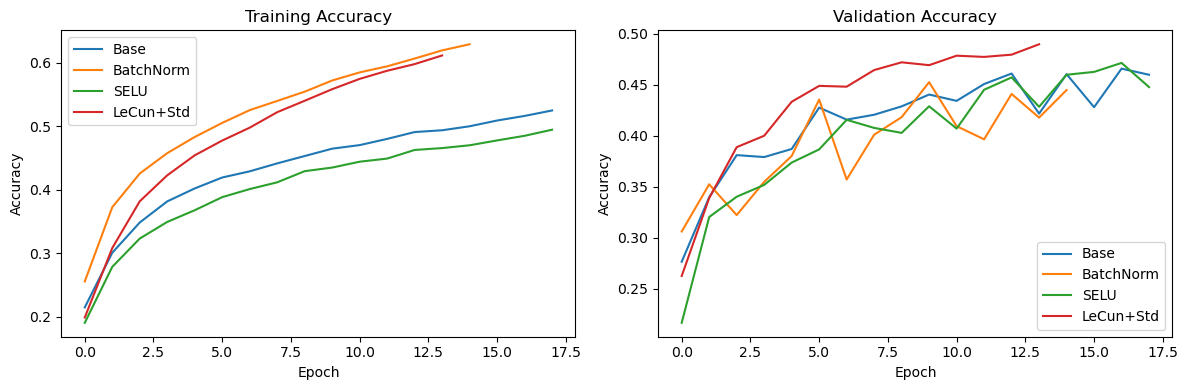

In [53]:
# Define early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,#wie viele Epochen ohne Verbesserung
    min_delta=0.001,
    restore_best_weights=True
)

# Train base model
print("Training base model...")
history_base = model_base.fit(
    X_train, y_train,
    epochs=30,  # Reduced from 30 for faster execution
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Train batch normalization model
print("Training batch normalization model...")
history_batch_norm = model_batch_norm.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Train SELU model
print("Training SELU model...")
history_selu = model_selu.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Train LeCun model with standardized data
print("Training LeCun model with standardized data...")
history_lecun = model_lecun.fit(
    X_train_std, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate all models
print("Evaluating models...")

# Base model
base_loss, base_acc = model_base.evaluate(X_test, y_test)
print(f"Base model - Test accuracy: {base_acc:.4f}")

# Batch normalization model
bn_loss, bn_acc = model_batch_norm.evaluate(X_test, y_test)
print(f"Batch normalization model - Test accuracy: {bn_acc:.4f}")

# SELU model
selu_loss, selu_acc = model_selu.evaluate(X_test, y_test)
print(f"SELU model - Test accuracy: {selu_acc:.4f}")

# LeCun model with standardized data
lecun_loss, lecun_acc = model_lecun.evaluate(X_test_std, y_test)
print(f"LeCun model with standardized data - Test accuracy: {lecun_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Base')
plt.plot(history_batch_norm.history['accuracy'], label='BatchNorm')
plt.plot(history_selu.history['accuracy'], label='SELU')
plt.plot(history_lecun.history['accuracy'], label='LeCun+Std')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='Base')
plt.plot(history_batch_norm.history['val_accuracy'], label='BatchNorm')
plt.plot(history_selu.history['val_accuracy'], label='SELU')
plt.plot(history_lecun.history['val_accuracy'], label='LeCun+Std')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
# Print accuracy for each model
print(f"Base model accuracy: {base_acc:.4f}")
print(f"BatchNorm model accuracy: {bn_acc:.4f}")
print(f"SELU model accuracy: {selu_acc:.4f}")
print(f"LeCun model accuracy: {lecun_acc:.4f}")

Base model accuracy: 0.4606
BatchNorm model accuracy: 0.4471
SELU model accuracy: 0.4686
LeCun model accuracy: 0.4710


6. Alpha-Dropout vs MC-Dropout

In [55]:
# Function for MC-Dropout evaluation
#mcdrop unsicher in vorhersagen schätzen
def mc_dropout_predict(model, X, num_samples=10):
    predictions = []
    for _ in range(num_samples):
        pred = model.predict(X, verbose=0)
        predictions.append(pred)
    
    # Average predictions
    avg_pred = np.mean(predictions, axis=0)
    return avg_pred

# Create a model with MC-Dropout for the best model (the BatchNorm model)
def create_mc_dropout_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Flatten()(inputs)
    
    for _ in range(20):
        x = layers.Dense(100, kernel_initializer='he_normal')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('swish')(x)
        x = layers.Dropout(0.1)(x, training=True)  # Always active
    
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

# Create a model with Alpha-Dropout
#erhalten der selu aktivierung
def create_alpha_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    
    for _ in range(20):
        model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='selu'))
        model.add(layers.AlphaDropout(0.1))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

# Create and evaluate these models using the weights from the trained models
# For MC-Dropout
mc_dropout_model = create_mc_dropout_model()
# Copy weights from the best model (batch norm)
for i, layer in enumerate(mc_dropout_model.layers):
    if isinstance(layer, (layers.Dense, layers.BatchNormalization)):
        try:
            layer.set_weights(model_batch_norm.layers[i].get_weights())
        except:
            pass

# For Alpha-Dropout
alpha_dropout_model = create_alpha_dropout_model()
# Copy weights from the SELU model
for i, layer in enumerate(alpha_dropout_model.layers):
    if isinstance(layer, layers.Dense):
        try:
            layer.set_weights(model_selu.layers[i].get_weights())
        except:
            pass

# Evaluate MC-Dropout
mc_dropout_predictions = mc_dropout_predict(mc_dropout_model, X_test)
mc_dropout_accuracy = np.mean(np.argmax(mc_dropout_predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"MC-Dropout accuracy: {mc_dropout_accuracy:.4f}")

# Evaluate Alpha-Dropout
alpha_dropout_predictions = alpha_dropout_model.predict(X_test)
alpha_dropout_accuracy = np.mean(np.argmax(alpha_dropout_predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Alpha-Dropout accuracy: {alpha_dropout_accuracy:.4f}")

MC-Dropout accuracy: 0.1010
313/313 [==============================] - 2s 5ms/step
Alpha-Dropout accuracy: 0.0847


7. Confusion Matrix of the Best Model

Base model accuracy: 0.46059998869895935
BatchNorm model accuracy: 0.4471000134944916
SELU model accuracy: 0.46860000491142273
LeCun model accuracy: 0.47099998593330383
Best model is: LeCun with accuracy: 0.4710
313/313 [==============================] - 2s 7ms/step


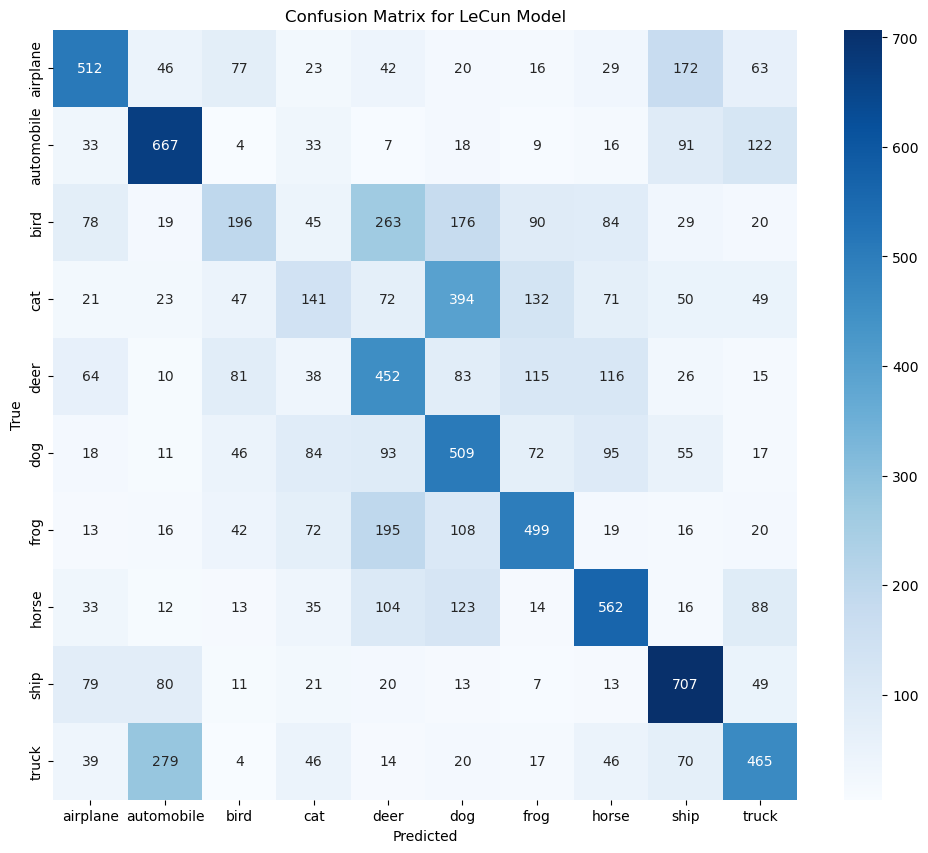

Best recognized class: ship with accuracy 0.7070
Worst recognized class: cat with accuracy 0.1410


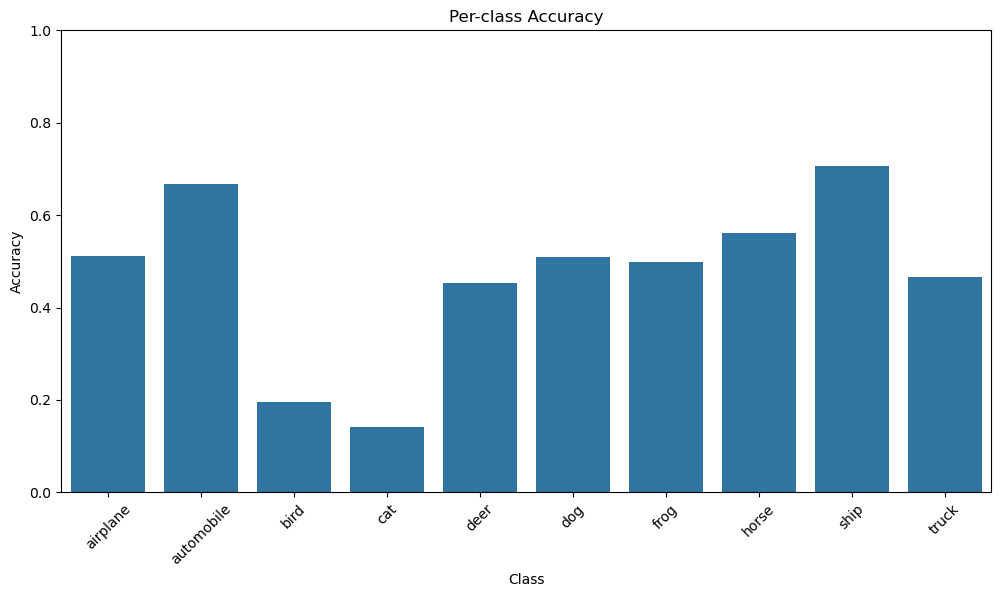

In [56]:
# Find the best model based on test accuracy
accuracies = [base_acc, bn_acc, selu_acc, lecun_acc]
models = [model_base, model_batch_norm, model_selu, model_lecun]
model_names = ["Base", "BatchNorm", "SELU", "LeCun"]
test_data = [X_test, X_test, X_test, X_test_std]

print(f"Base model accuracy: {base_acc}")
print(f"BatchNorm model accuracy: {bn_acc}")
print(f"SELU model accuracy: {selu_acc}")
print(f"LeCun model accuracy: {lecun_acc}")
best_idx = np.argmax(accuracies)
best_model = models[best_idx]
best_model_name = model_names[best_idx]
best_test_data = test_data[best_idx]

print(f"Best model is: {best_model_name} with accuracy: {accuracies[best_idx]:.4f}")

# Generate confusion matrix for the best model
y_pred = best_model.predict(best_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ' + best_model_name + ' Model')
plt.show()

# Calculate per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Find best and worst recognized classes
best_class_idx = np.argmax(per_class_accuracy)
worst_class_idx = np.argmin(per_class_accuracy)

print(f"Best recognized class: {class_names[best_class_idx]} with accuracy {per_class_accuracy[best_class_idx]:.4f}")
print(f"Worst recognized class: {class_names[worst_class_idx]} with accuracy {per_class_accuracy[worst_class_idx]:.4f}")

# Show per-class accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=per_class_accuracy)
plt.title('Per-class Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()